# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

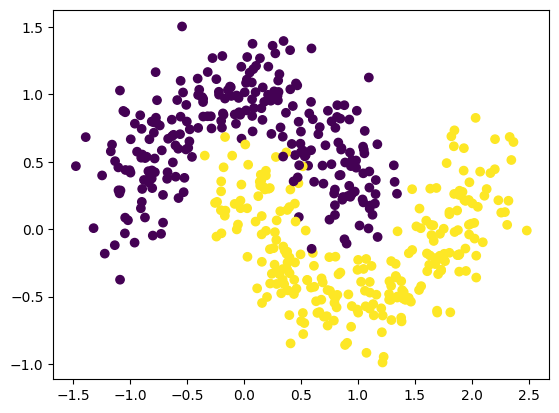

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

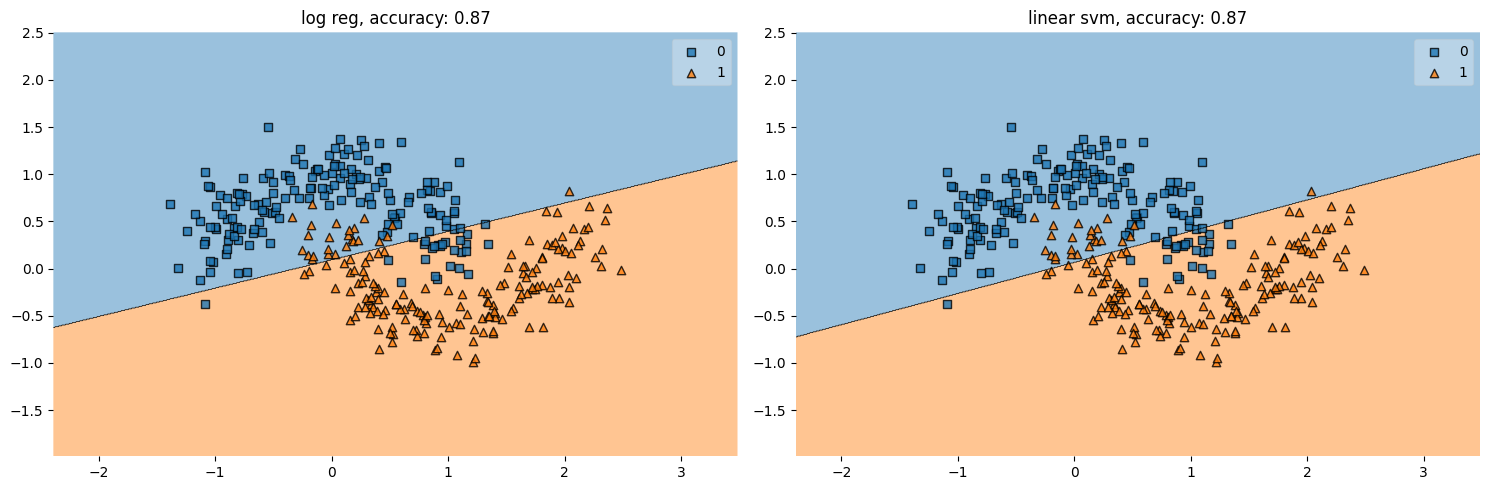

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.3, random_state=42)

### YOUR CODE HERE
def plot_decisions(X, y, estimators, titles):
    _, axes = plt.subplots(1, len(estimators), figsize=(15, 5))
    if len(estimators) == 1:
        axes = [axes]
    for ax, est, title in zip(axes, estimators, titles):
        est.fit(X, y)
        y_pred = est.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        plot_decision_regions(X, y, clf=est, ax=ax)
        ax.set_title(f'{title}, accuracy: {accuracy:.2f}')
    plt.tight_layout()
    plt.show()

log_reg = LogisticRegression(C=1.0, random_state=42)
linear_svm = SVC(kernel='linear', C=1.0, random_state=42)

estimators = [log_reg, linear_svm]
titles = ['log reg', 'linear svm']

plot_decisions(X_train, y_train, estimators, titles)



Обе модели делают линейную апроксимацию и как видно из графиков, 2 класса не разграничить линией без ошибок. Тем не меннее точность в 87% в каких-то случаях будет приемлема + простота модели.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

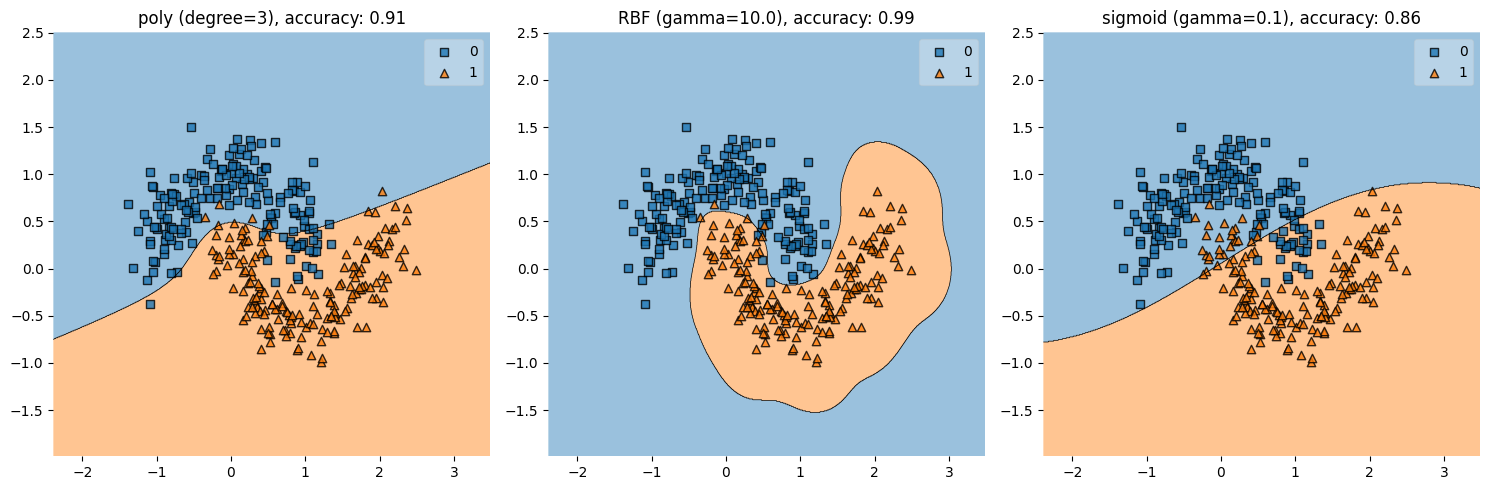

In [25]:
### YOUR CODE HERE
def try_svm_kernels(X_train, y_train, X_test, y_test):
    kernel_configs = [
        {'kernel': 'poly', 'degree': 2, 'C': 1.0, 'title': 'poly (degree=2)'},
        {'kernel': 'poly', 'degree': 3, 'C': 1.0, 'title': 'poly (degree=3)'},
        {'kernel': 'poly', 'degree': 4, 'C': 1.0, 'title': 'poly (degree=4)'},
        {'kernel': 'rbf', 'gamma': 0.1, 'C': 1.0, 'title': 'RBF (gamma=0.1)'},
        {'kernel': 'rbf', 'gamma': 1.0, 'C': 1.0, 'title': 'RBF (gamma=1.0)'},
        {'kernel': 'rbf', 'gamma': 10.0, 'C': 1.0, 'title': 'RBF (gamma=10.0)'},
        {'kernel': 'sigmoid', 'gamma': 0.1, 'C': 1.0, 'title': 'sigmoid (gamma=0.1)'},
        {'kernel': 'sigmoid', 'gamma': 1.0, 'C': 1.0, 'title': 'sigmoid (gamma=1.0)'},
    ]

    best_configs = {}

    for config in kernel_configs:
        if config['kernel'] == 'poly':
            svm = SVC(kernel=config['kernel'], degree=config['degree'], C=config['C'], random_state=42)
        else:
            svm = SVC(kernel=config['kernel'], gamma=config['gamma'], C=config['C'], random_state=42)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        kernel_type = config['kernel']
        if kernel_type not in best_configs or accuracy > best_configs[kernel_type]['accuracy']:
            best_configs[kernel_type] = {
                'config': config.copy(),
                'accuracy': accuracy,
                'model': svm
            }
    best_estimators = []
    best_titles = []

    for kernel_type in ['poly', 'rbf', 'sigmoid']:
        if kernel_type in best_configs:
            best_config = best_configs[kernel_type]
            best_estimators.append(best_config['model'])
            best_titles.append(best_config['config']['title'])
    plot_decisions(X_train, y_train, best_estimators, best_titles)
    return best_configs

best_configs = try_svm_kernels(X_train, y_train, X_test, y_test)

Сигмойд дал точность меньшую чем линейное ядро. В остальных случаях ядра получили больше точности. Как видно из графиков, rbf создает "оболочку" вокруг одного из классов, что дает большую точность в 99%. Полиномиальное ядро подстаривает полиномиальную функцию под датасет, чем больше степень полинома тем больше график подстроится под геометрию датасета. Слишком большая степень полинома и слишком прижатая оболочка в rbf могут дать много точности, но ухудшить генерализацию модели. По этому следует соблюдать баланс.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

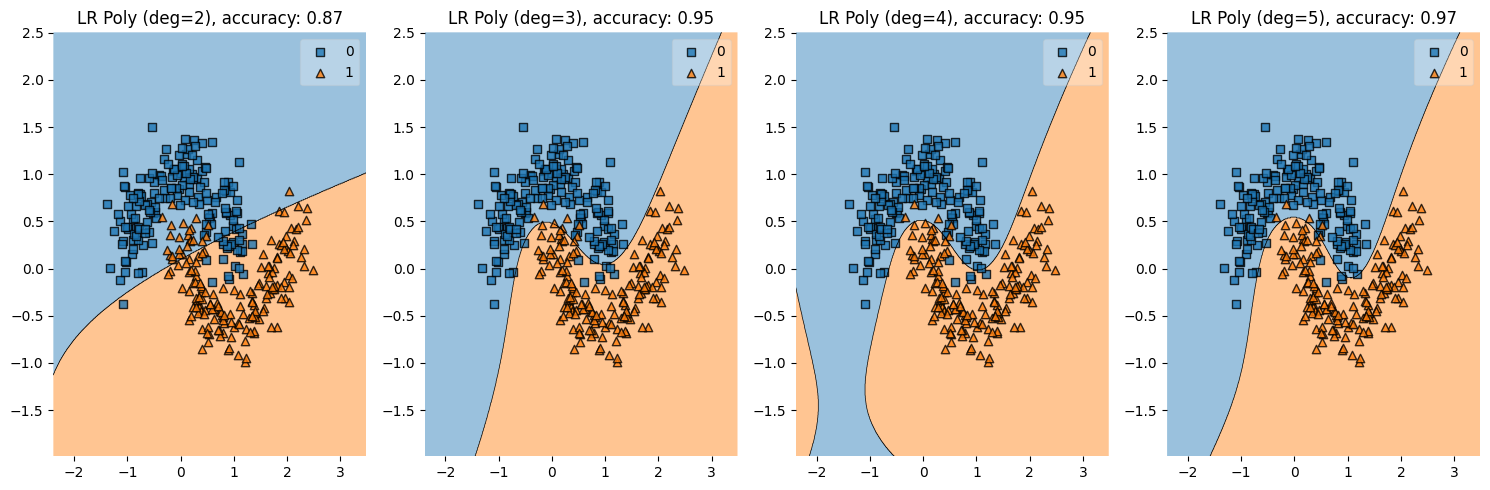

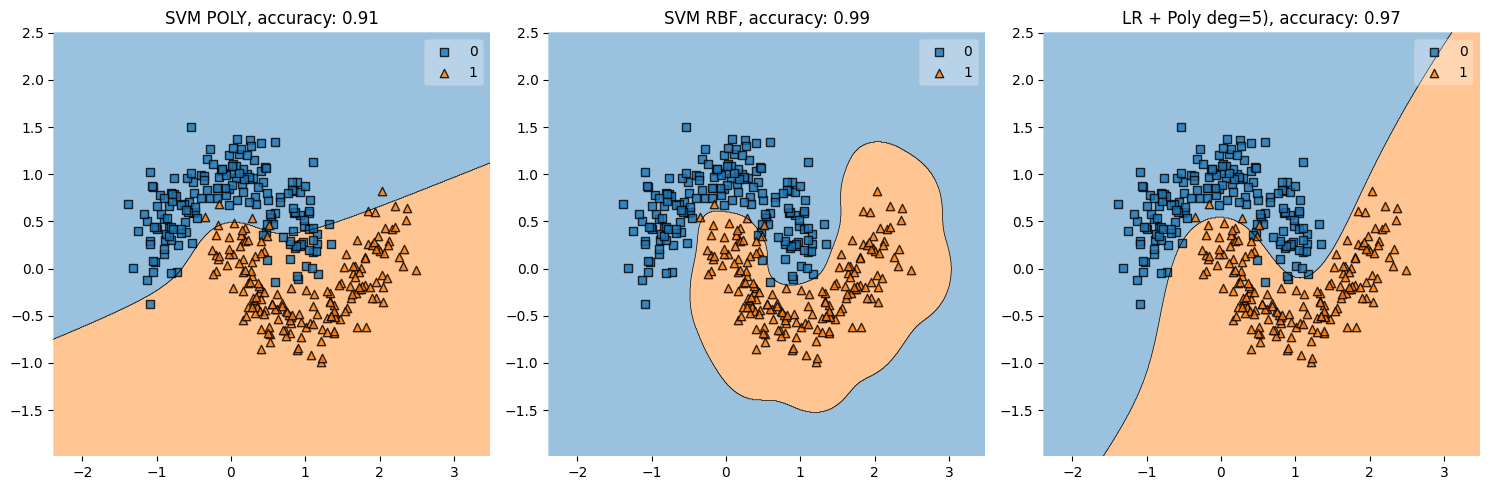

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### YOUR CODE HERE
def try_poly(best_configs, X_train, y_train, X_test, y_test):
    poly_degrees = [2, 3, 4, 5]

    best_poly_lr = None
    best_poly_accuracy = 0
    best_poly_degree = 0

    poly_estimators = []
    poly_titles = []

    for degree in poly_degrees:
        poly_lr = make_pipeline(
            PolynomialFeatures(degree=degree, include_bias=False),
            LogisticRegression(C=1.0, max_iter=1000)
        )

        poly_lr.fit(X_train, y_train)
        y_pred = poly_lr.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > best_poly_accuracy:
            best_poly_accuracy = accuracy
            best_poly_lr = poly_lr
            best_poly_degree = degree
        poly_estimators.append(poly_lr)
        poly_titles.append(f'LR Poly (deg={degree})')

    plot_decisions(X_train, y_train, poly_estimators, poly_titles)

    best_svm_models = []
    best_svm_titles = []
    best_svm_accuracies = []

    for kernel_type in ['poly', 'rbf']:
        if kernel_type in best_configs:
            best_config = best_configs[kernel_type]
            model = best_config['model']
            accuracy = best_config['accuracy']
            best_svm_models.append(model)
            best_svm_titles.append(f"SVM {kernel_type.upper()}")
            best_svm_accuracies.append(accuracy)

    best_svm_models.append(best_poly_lr)
    best_svm_titles.append(f"LR + Poly deg={best_poly_degree})")
    best_svm_accuracies.append(best_poly_accuracy)

    plot_decisions(X_train, y_train, best_svm_models, best_svm_titles)

try_poly(best_configs, X_train, y_train, X_test, y_test)

Полиномиальные фичи улучшили результат логистической регрессии. С deg=4 видно как образуются островки в которых нет объектов класса, что может сыграть в итоге в минус на реальных данных. И как видим svm + rbf ядро все еще лучше по точности.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

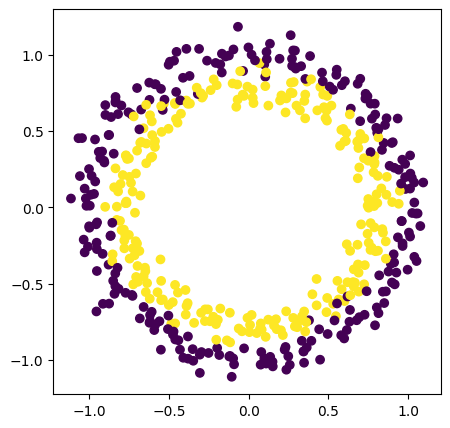

In [6]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

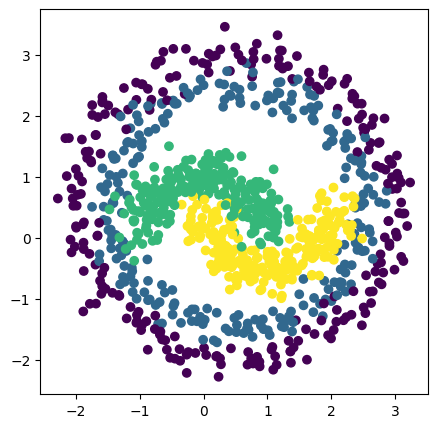

In [7]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

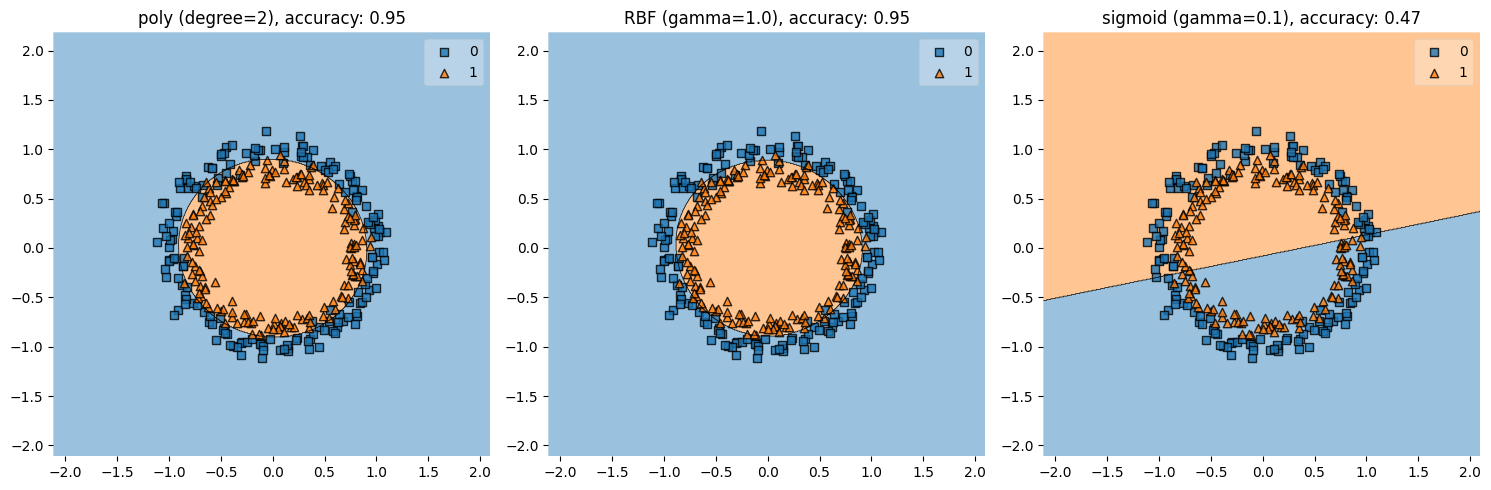

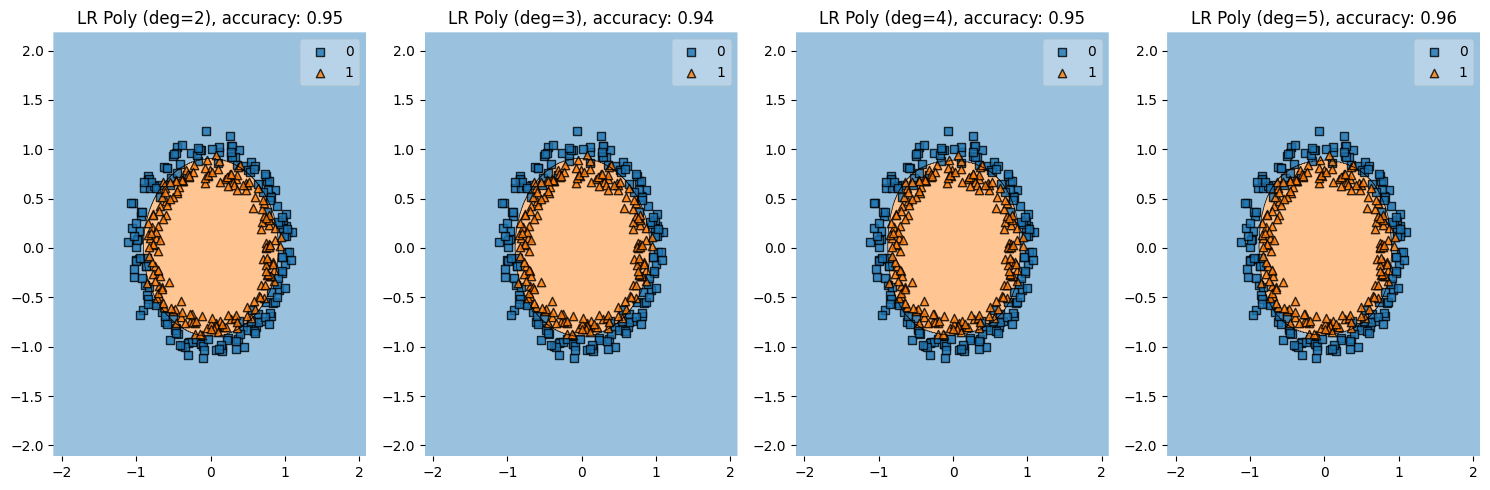

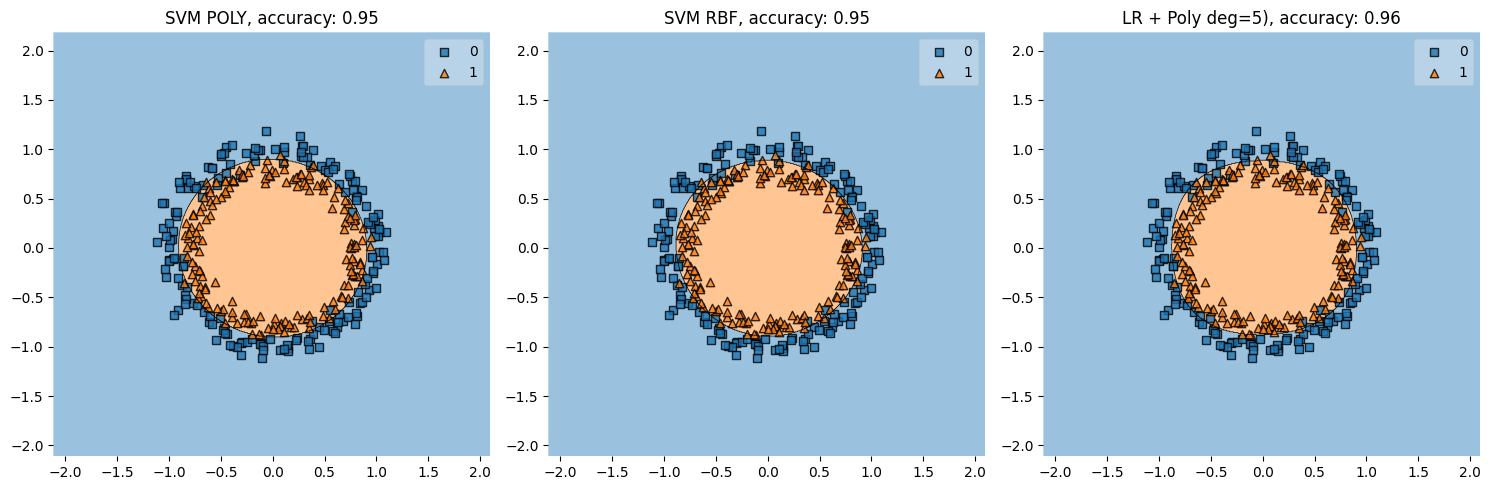

/Users/e.lebedev/personal/mipt/ml_course/cont_comb_ml/.venv/lib/python3.13/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/Users/e.lebedev/personal/mipt/ml_course/cont_comb_ml/.venv/lib/python3.13/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/Users/e.lebedev/personal/mipt/ml_course/cont_comb_ml/.venv/lib/python3.13/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


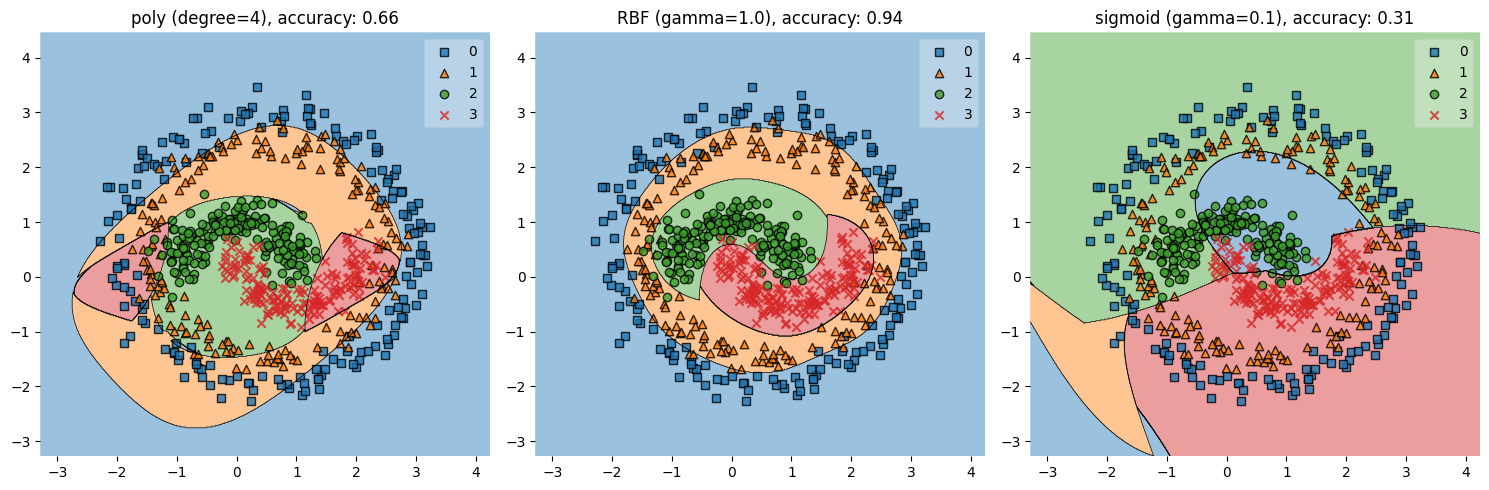

/Users/e.lebedev/personal/mipt/ml_course/cont_comb_ml/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/e.lebedev/personal/mipt/ml_course/cont_comb_ml/.venv/lib/python3.13/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/Users/e.lebedev/personal/

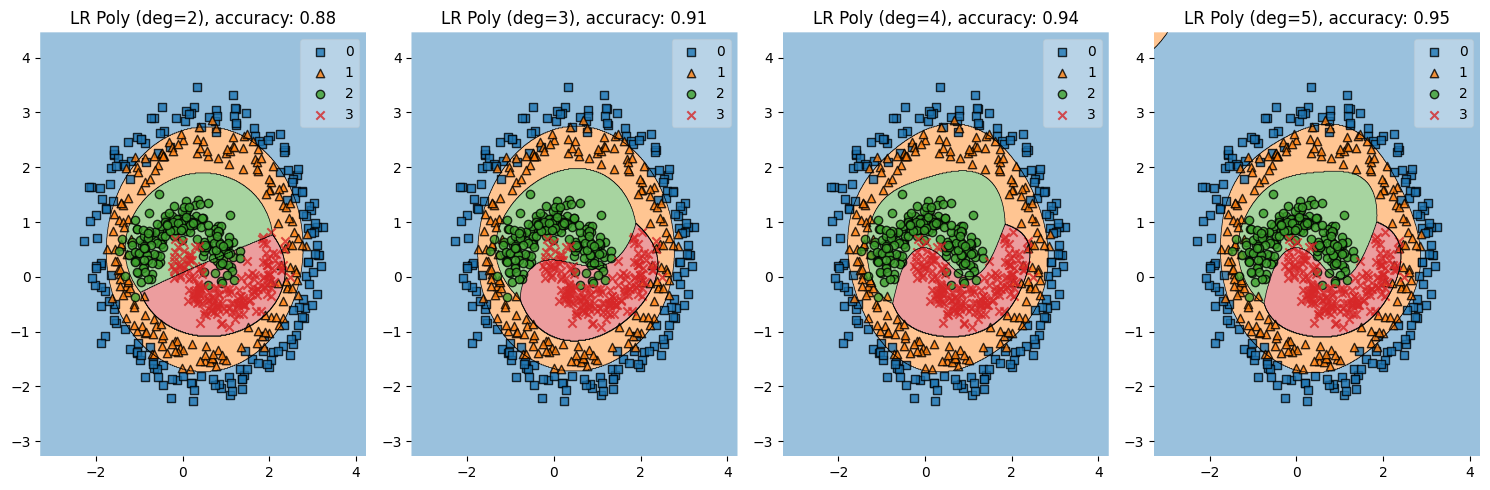

/Users/e.lebedev/personal/mipt/ml_course/cont_comb_ml/.venv/lib/python3.13/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/Users/e.lebedev/personal/mipt/ml_course/cont_comb_ml/.venv/lib/python3.13/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/Users/e.lebedev/personal/mipt/ml_course/cont_comb_ml/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter

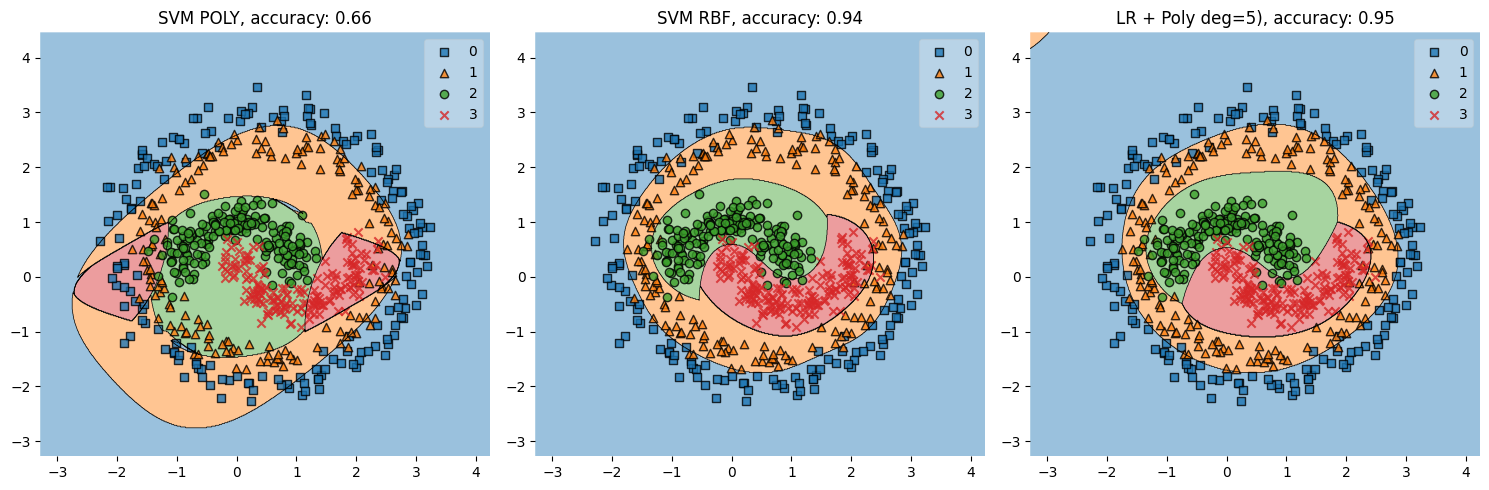

In [27]:
### YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(circles_points, circles_labels, test_size=0.3, random_state=42)
best_configs = try_svm_kernels(X_train, y_train, X_test, y_test)
try_poly(best_configs, X_train, y_train, X_test, y_test)

X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.3, random_state=42)
best_configs = try_svm_kernels(X_train, y_train, X_test, y_test)
try_poly(best_configs, X_train, y_train, X_test, y_test)


Проведя эксперименты видим что логистическая регрессия + полиномиальные фичи c degree=5 примерно на равне по точности с svm + rbf во всех датасетах. Мне больше нравится svm + rbf так как он проще в настройке, хоть и в последнем датасете он проигрывает на 0.01 точности логрегрессии с поли фичами.